In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from statistics import mean

In [2]:
df = pd.read_csv('cell_rows.csv')
df = df.drop(columns=df.columns[0])
df = df.reset_index(drop=True)

In [3]:
df

,ID,0:00:00,0:00:05,0:00:10,0:00:15,0:00:20,0:00:25,0:00:30,0:00:35,0:00:40,...,0:59:25,0:59:30,0:59:35,0:59:40,0:59:45,0:59:50,0:59:55,1:00:00,1:00:05,1:00:10
0,2,0.543,0.543,0.545,0.551,0.542,0.538,0.553,0.537,0.548,...,0.604,0.608,0.591,0.603,0.605,0.598,0.595,0.599,0.605,0.614
1,3,0.618,0.629,0.625,0.624,0.615,0.608,0.630,0.628,0.620,...,0.633,0.646,0.628,0.638,0.647,0.628,0.633,0.628,0.636,0.632
2,4,0.566,0.587,0.576,0.579,0.573,0.577,0.582,0.576,0.577,...,0.570,0.580,0.592,0.609,0.586,0.567,0.572,0.574,0.575,0.576
3,6,0.635,0.646,0.631,0.636,0.631,0.603,0.633,0.632,0.629,...,0.586,0.593,0.589,0.583,0.585,0.612,0.608,0.585,0.613,0.594
4,7,0.626,0.626,0.602,0.612,0.623,0.609,0.626,0.614,0.611,...,0.689,0.670,0.698,0.692,0.713,0.782,0.817,0.796,0.764,0.712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,965,0.578,0.578,0.577,0.571,0.578,0.567,0.588,0.579,0.584,...,0.635,0.628,0.625,0.624,0.631,0.622,0.621,0.616,0.628,0.624
878,966,0.610,0.616,0.605,0.613,0.637,0.592,0.624,0.603,0.617,...,0.601,0.595,0.603,0.585,0.590,0.575,0.582,0.594,0.614,0.596
879,967,0.655,0.673,0.666,0.665,0.659,0.665,0.684,0.675,0.664,...,0.695,0.691,0.693,0.680,0.691,0.683,0.677,0.682,0.687,0.687
880,968,0.483,0.498,0.491,0.488,0.494,0.490,0.508,0.486,0.498,...,0.528,0.524,0.533,0.528,0.561,0.533,0.543,0.537,0.533,0.539


In [4]:
ids = df.ID.unique()
ids[:20]

array([ 2,  3,  4,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 17, 18, 20, 22,
       23, 25, 26])

In [5]:
cell_df_no_id = df.drop(columns=['ID'])
cell_df_no_id

,0:00:00,0:00:05,0:00:10,0:00:15,0:00:20,0:00:25,0:00:30,0:00:35,0:00:40,0:00:45,...,0:59:25,0:59:30,0:59:35,0:59:40,0:59:45,0:59:50,0:59:55,1:00:00,1:00:05,1:00:10
0,0.543,0.543,0.545,0.551,0.542,0.538,0.553,0.537,0.548,0.558,...,0.604,0.608,0.591,0.603,0.605,0.598,0.595,0.599,0.605,0.614
1,0.618,0.629,0.625,0.624,0.615,0.608,0.630,0.628,0.620,0.610,...,0.633,0.646,0.628,0.638,0.647,0.628,0.633,0.628,0.636,0.632
2,0.566,0.587,0.576,0.579,0.573,0.577,0.582,0.576,0.577,0.577,...,0.570,0.580,0.592,0.609,0.586,0.567,0.572,0.574,0.575,0.576
3,0.635,0.646,0.631,0.636,0.631,0.603,0.633,0.632,0.629,0.616,...,0.586,0.593,0.589,0.583,0.585,0.612,0.608,0.585,0.613,0.594
4,0.626,0.626,0.602,0.612,0.623,0.609,0.626,0.614,0.611,0.614,...,0.689,0.670,0.698,0.692,0.713,0.782,0.817,0.796,0.764,0.712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,0.578,0.578,0.577,0.571,0.578,0.567,0.588,0.579,0.584,0.578,...,0.635,0.628,0.625,0.624,0.631,0.622,0.621,0.616,0.628,0.624
878,0.610,0.616,0.605,0.613,0.637,0.592,0.624,0.603,0.617,0.618,...,0.601,0.595,0.603,0.585,0.590,0.575,0.582,0.594,0.614,0.596
879,0.655,0.673,0.666,0.665,0.659,0.665,0.684,0.675,0.664,0.665,...,0.695,0.691,0.693,0.680,0.691,0.683,0.677,0.682,0.687,0.687
880,0.483,0.498,0.491,0.488,0.494,0.490,0.508,0.486,0.498,0.499,...,0.528,0.524,0.533,0.528,0.561,0.533,0.543,0.537,0.533,0.539


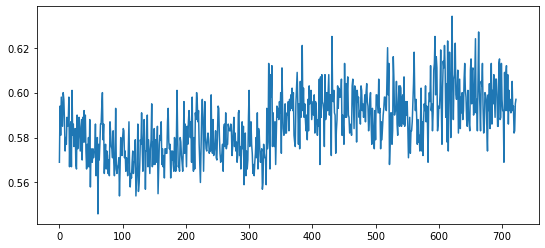

In [6]:
plt.figure(figsize=(9,4))
id_ = list(cell_df_no_id.iloc[169])
plt.plot(id_)

In [7]:
df[df['ID'] == 169]

,ID,0:00:00,0:00:05,0:00:10,0:00:15,0:00:20,0:00:25,0:00:30,0:00:35,0:00:40,...,0:59:25,0:59:30,0:59:35,0:59:40,0:59:45,0:59:50,0:59:55,1:00:00,1:00:05,1:00:10
138,169,0.588,0.589,0.588,0.585,0.592,0.582,0.601,0.588,0.585,...,0.811,0.773,0.712,0.644,0.615,0.603,0.602,0.596,0.602,0.606


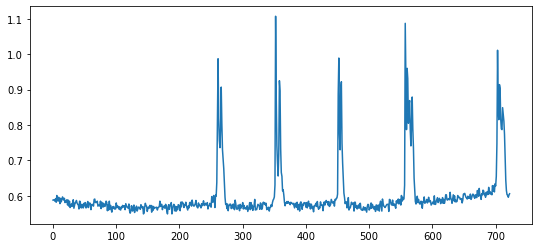

In [8]:
plt.figure(figsize=(9,4))
plt.plot(list(df[df['ID'] == 169].values)[0][1:])

In [9]:
id_169 = list(list(df[df['ID'] == 169].values)[0][1:])

In [10]:
print(np.mean(id_169))
print(np.std(id_169))
print(np.mean(id_169) + (np.std(id_169) / 2))

0.5983029045643153
0.07336921036039509
0.6349875097445129


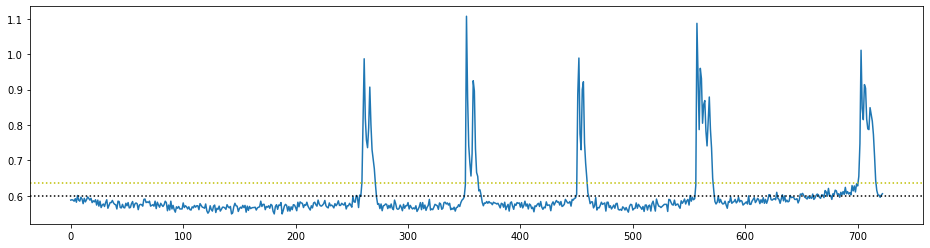

In [11]:
plt.figure(figsize=(16,4))
plt.plot(id_169)
plt.axhline(y=np.mean(id_169), color='k', linestyle=':')
plt.axhline(y=np.mean(id_169) + (np.std(id_169) / 2), color='y', linestyle=':')

In [12]:
print(id_169[250:275])

[0.568, 0.598, 0.583, 0.582, 0.601, 0.596, 0.567, 0.602, 0.599, 0.638, 0.82, 0.987, 0.819, 0.757, 0.736, 0.792, 0.907, 0.802, 0.73, 0.703, 0.677, 0.633, 0.596, 0.576, 0.578]


In [13]:
def calc_cum_ma(array): # function to calculate cumulative moving averages for an array
    
    moving_averages = list()
    cum_sum = np.cumsum(array)
    
    i = 1    
    while i <= len(array):

        window_average = round(cum_sum[i-1] / i, 3)
        moving_averages.append(window_average)

        i += 1
    return moving_averages

ma_169 = calc_cum_ma(id_169)

In [14]:
half_std = np.std(id_169) / 2
threshold = [i + half_std for i in ma_169]

Text(0.5, 1.0, 'Moving average and 0.5 stdev as spike cutoff. ROI 169')

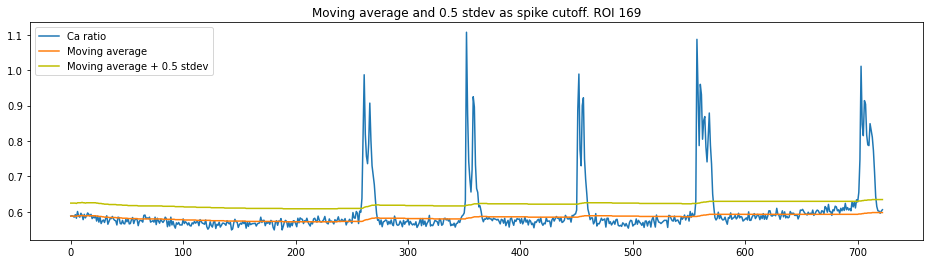

In [15]:
plt.figure(figsize=(16,4))
plt.plot(id_169)
plt.plot(ma_169)
plt.plot(threshold, color='y')
plt.legend(['Ca ratio', 'Moving average', 'Moving average + 0.5 stdev'])
plt.title('Moving average and 0.5 stdev as spike cutoff. ROI 169')

Text(0.5, 1.0, 'Moving average and 0.5 stdev as spike cutoff. ROI 2')

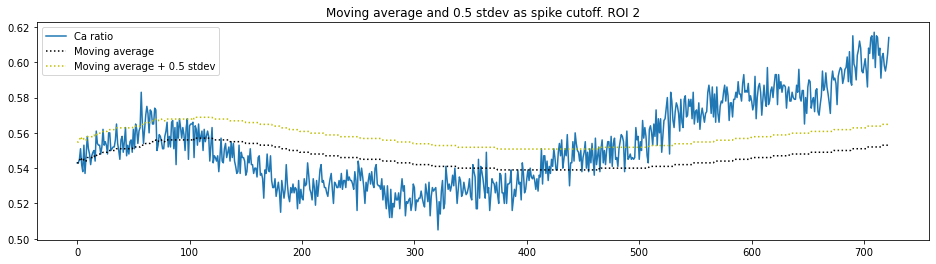

In [16]:
id_2 = list(list(df[df['ID'] == 2].values)[0][1:])
ma_2 = calc_cum_ma(id_2)
half_std_2 = np.std(id_2) / 2
threshold_2 = [i + half_std_2 for i in ma_2]
plt.figure(figsize=(16,4))
plt.plot(id_2)
plt.plot(ma_2, color='k', linestyle=':')
plt.plot(threshold_2, color='y', linestyle=':')
plt.legend(['Ca ratio', 'Moving average', 'Moving average + 0.5 stdev'])
plt.title('Moving average and 0.5 stdev as spike cutoff. ROI 2')

# Next, let's write a function to identify and record information about each spike. We'll start with ROI 169 because the spikes are clear.

Text(0.5, 1.0, 'Cumulative moving average and 0.5 stdev. ROI 169')

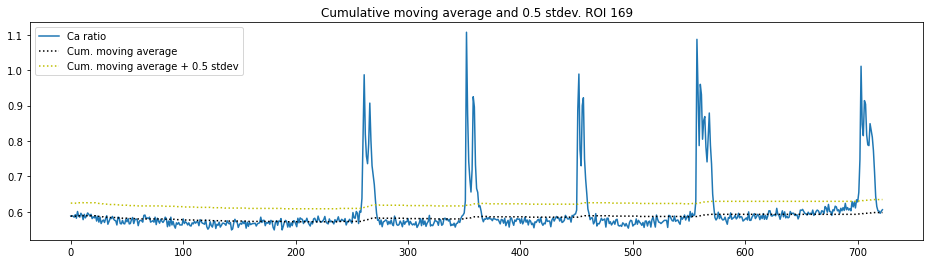

In [17]:
plt.figure(figsize=(16,4))
plt.plot(id_169)
plt.plot(ma_169, color='k', linestyle=':')
plt.plot(threshold, color='y', linestyle=':')
plt.legend(['Ca ratio', 'Cum. moving average', 'Cum. moving average + 0.5 stdev'])
plt.title('Cumulative moving average and 0.5 stdev. ROI 169')

In [18]:
print(id_169[255:275])
print(threshold[255:275])

[0.596, 0.567, 0.602, 0.599, 0.638, 0.82, 0.987, 0.819, 0.757, 0.736, 0.792, 0.907, 0.802, 0.73, 0.703, 0.677, 0.633, 0.596, 0.576, 0.578]
[0.6096846051801975, 0.6096846051801975, 0.6096846051801975, 0.6096846051801975, 0.6096846051801975, 0.6106846051801975, 0.6126846051801975, 0.6136846051801975, 0.6146846051801975, 0.6146846051801975, 0.6156846051801975, 0.6166846051801975, 0.6176846051801975, 0.6186846051801975, 0.6186846051801975, 0.6186846051801975, 0.6196846051801975, 0.6196846051801975, 0.6196846051801975, 0.6196846051801975]


In [19]:
def find_spikes(array, std_threshold=0.5):
    
    ma = calc_cum_ma(array)
    std = np.std(array) * std_threshold
    threshold = [i + std for i in ma]
    
    spike_starts = list()
    spike_ends = list()

    in_spike = False
    for i in range(len(array)):
        if array[i] >= threshold[i] and array[i-1] < threshold[i] and in_spike == False:
            spike_starts.append(i)
            in_spike = True
        if array[i] <= threshold[i] and array[i-1] > threshold[i] and in_spike == True:
            spike_ends.append(i)
            in_spike = False
    
    # if a spike starts and continues until the end of the frame, we'll just consider the final index - 1 as the end
    if len(spike_starts) > len(spike_ends):
        spike_ends.append(int(len(array) - 1))
    return spike_starts, spike_ends, threshold

In [20]:
# test_roi = list(list(df[df['ID'] == ids[3]].values)[0][1:])
test_roi = list(list(df[df['ID'] == 15].values)[0][1:])

starts, ends, threshold = find_spikes(test_roi, std_threshold=1)

print(starts)
print(ends)
print(len(starts))
print(len(ends))

[651]
[652]
1
1


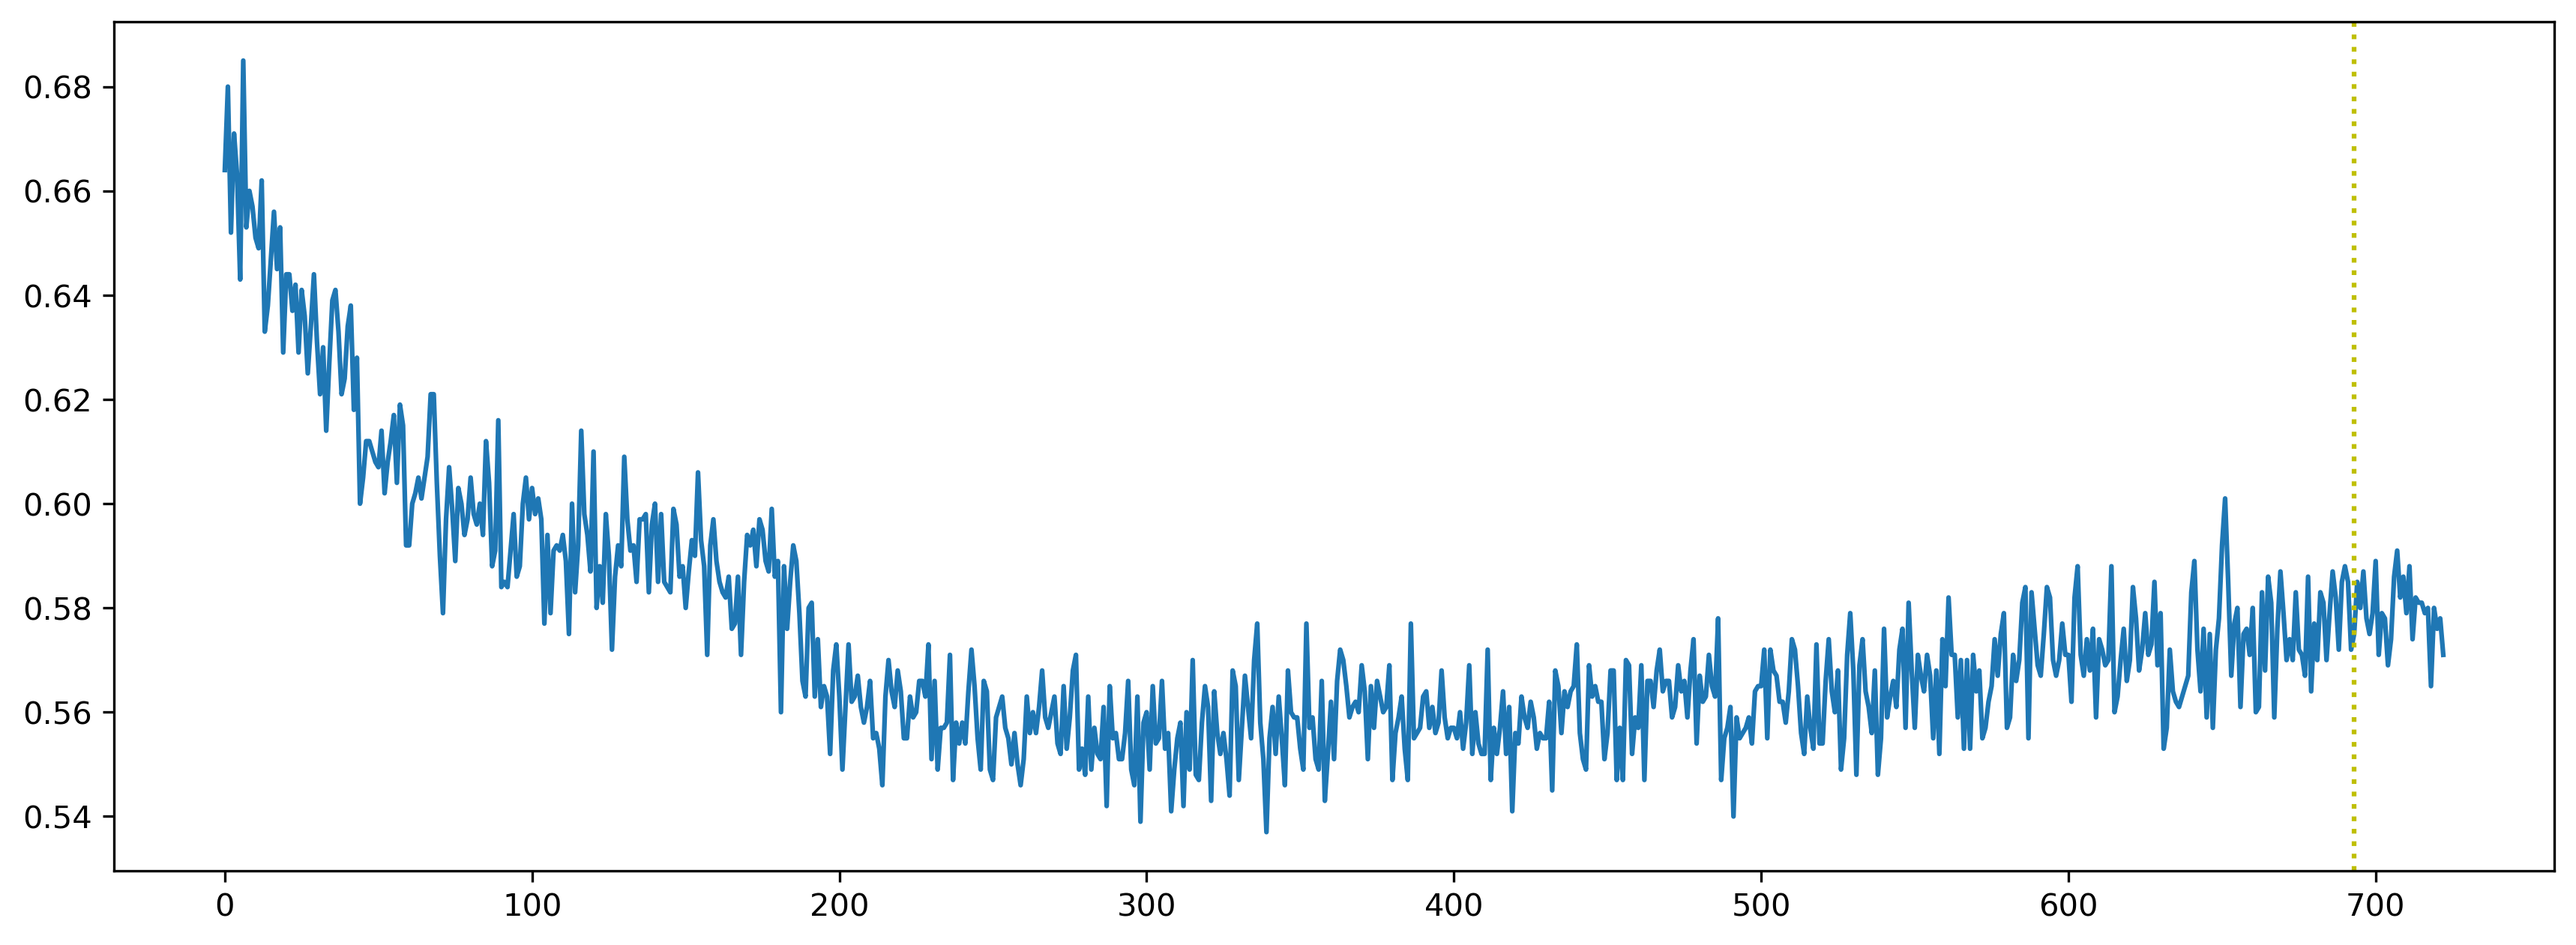

In [21]:
plt.figure(figsize=(14,5), dpi=300)
plt.plot(test_roi)
plt.axvline(x=693, color='y', linestyle='dotted')

In [22]:
print(test_roi[690:720])

[0.588, 0.585, 0.572, 0.575, 0.585, 0.58, 0.587, 0.578, 0.575, 0.579, 0.589, 0.571, 0.579, 0.578, 0.569, 0.574, 0.586, 0.591, 0.582, 0.586, 0.579, 0.588, 0.574, 0.582, 0.581, 0.581, 0.579, 0.58, 0.565, 0.58]


In [23]:
starts_169, ends_169, threshold_169 = find_spikes(id_169, std_threshold=0.5)

In [24]:
print(starts_169)
print(ends_169)
print(len(starts_169), len(ends_169))

[259, 351, 451, 556, 699, 701]
[272, 363, 460, 572, 700, 717]
6 6


In [25]:
# calculate spike durations, heights, and mean values

durations = [ends_169[i] - starts_169[i] for i in range(len(starts_169))]

heights = []
means = []

for i in range(len(starts_169)):
    spike = id_169[starts_169[i]-1:ends_169[i]+1]
    height = max(spike)
    heights.append(height)
    mean_ = round(mean(spike), 3)
    means.append(mean_)


In [26]:
print(durations)
print(heights)
print(means)

print(len(starts_169))
print(mean(durations))
print(mean(heights))
print(mean(means))
print(mean(id_2))

[13, 12, 9, 16, 1, 16]
[0.987, 1.107, 0.989, 1.087, 0.634, 1.011]
[0.746, 0.751, 0.774, 0.803, 0.624, 0.786]
6
11.166666666666666
0.9691666666666666
0.7473333333333334
0.5529280774550485


Text(0.5, 1.0, 'Moving average and 0.5 stdev as spike cutoff. ROI 169')

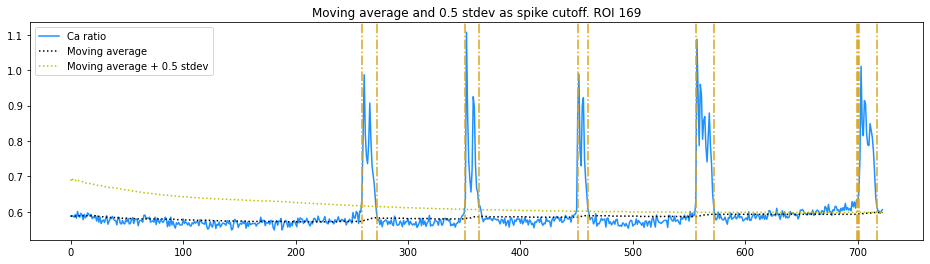

In [27]:
plt.figure(figsize=(16,4))
plt.plot(id_169, color='dodgerblue')
plt.plot(ma_169, color='k', linestyle=':')
plt.plot(threshold, color='y', linestyle=':')

for start in starts_169:
    plt.axvline(x=start, color='goldenrod', linestyle='dashdot')

for end in ends_169:
    plt.axvline(x=end, color='goldenrod', linestyle='dashdot')

plt.legend(['Ca ratio', 'Moving average', 'Moving average + 0.5 stdev'])
plt.title('Moving average and 0.5 stdev as spike cutoff. ROI 169')

# All right, let's tie all these function together and create a new dataset with the selected features for each ROI

In [28]:
list(list(df[df['ID'] == 29].values)[0][1:])

[0.646,
 0.658,
 0.659,
 0.654,
 0.653,
 0.654,
 0.683,
 0.66,
 0.656,
 0.654,
 0.661,
 0.648,
 0.664,
 0.654,
 0.651,
 0.669,
 0.653,
 0.655,
 0.657,
 0.638,
 0.643,
 0.639,
 0.647,
 0.622,
 0.638,
 0.622,
 0.621,
 0.621,
 0.634,
 0.641,
 0.628,
 0.625,
 0.64,
 0.621,
 0.628,
 0.639,
 0.63,
 0.631,
 0.629,
 0.639,
 0.63,
 0.638,
 0.635,
 0.636,
 0.632,
 0.634,
 0.646,
 0.636,
 0.63,
 0.628,
 0.641,
 0.623,
 0.63,
 0.637,
 0.633,
 0.63,
 0.629,
 0.642,
 0.641,
 0.638,
 0.621,
 0.634,
 0.647,
 0.63,
 0.621,
 0.626,
 0.641,
 0.631,
 0.627,
 0.622,
 0.63,
 0.612,
 0.622,
 0.625,
 0.625,
 0.635,
 0.623,
 0.632,
 0.62,
 0.63,
 0.629,
 0.635,
 0.63,
 0.624,
 0.637,
 0.632,
 0.634,
 0.618,
 0.621,
 0.65,
 0.626,
 0.622,
 0.627,
 0.63,
 0.624,
 0.633,
 0.638,
 0.632,
 0.618,
 0.625,
 0.63,
 0.626,
 0.631,
 0.634,
 0.633,
 0.627,
 0.615,
 0.618,
 0.63,
 0.623,
 0.614,
 0.625,
 0.628,
 0.621,
 0.608,
 0.623,
 0.642,
 0.613,
 0.613,
 0.617,
 0.649,
 0.624,
 0.63,
 0.621,
 0.634,
 0.623,
 0.62,
 0

In [29]:
parameter_list = list()


for id_ in ids:
    roi = list(list(df[df['ID'] == id_].values)[0][1:])

    starts, ends, threshold = find_spikes(roi, std_threshold=1)
    # print(len(starts))
    # print(len(ends))

    durations = [ends[i] - starts[i] for i in range(len(ends))]
    heights = []
    means = []
    
#     print(starts)
#     print(ends)

    if len(starts) > 0:
        for i in range(len(starts)):
            spike = roi[starts[i]-1:ends[i]+1]
            height = max(spike)
                
            heights.append(height)
            mean_ = round(mean(spike), 3)
            means.append(mean_)

    
        parameters = [mean(roi), len(starts), mean(durations), mean(heights), mean(means)]
        parameter_list.append(parameters)
        
    elif len(starts) == 0:
        parameters = [mean(roi), len(starts), 0, 0, 0]
        parameter_list.append(parameters)


In [30]:
len(parameter_list)

882

In [31]:
parameter_columns = ['ROI mean', 'Num. spikes', 'Mean spike duration', 'Mean spike height', 'Mean spike mean']
parameter_df = pd.DataFrame(parameter_list, columns = parameter_columns)

In [32]:
parameter_df

,ROI mean,Num. spikes,Mean spike duration,Mean spike height,Mean spike mean
0,0.552928,24,7.833333,0.581958,0.571542
1,0.619997,96,2.125000,0.637510,0.627292
2,0.564521,78,1.974359,0.582513,0.573064
3,0.548718,29,5.551724,0.591724,0.578517
4,0.623629,48,2.645833,0.669687,0.649771
...,...,...,...,...,...
877,0.606588,107,2.514019,0.625645,0.616308
878,0.595188,53,1.113208,0.614887,0.601472
879,0.663390,7,10.857143,0.812143,0.726143
880,0.530516,76,4.052632,0.558539,0.545987


In [33]:
Counter(parameter_df['Num. spikes'])

Counter({24: 10,
         96: 11,
         78: 5,
         29: 9,
         48: 7,
         75: 3,
         20: 13,
         88: 6,
         10: 14,
         19: 8,
         35: 12,
         2: 23,
         1: 26,
         26: 10,
         0: 36,
         105: 5,
         6: 23,
         70: 8,
         79: 7,
         5: 22,
         8: 19,
         43: 6,
         65: 3,
         63: 9,
         68: 7,
         76: 4,
         74: 7,
         122: 1,
         100: 6,
         60: 3,
         113: 2,
         89: 8,
         17: 11,
         37: 6,
         93: 3,
         39: 6,
         22: 14,
         4: 16,
         34: 7,
         12: 11,
         28: 9,
         62: 2,
         40: 4,
         44: 8,
         3: 29,
         99: 6,
         13: 9,
         81: 5,
         133: 2,
         98: 4,
         18: 11,
         117: 5,
         55: 1,
         16: 11,
         61: 8,
         66: 8,
         58: 5,
         143: 2,
         9: 9,
         80: 6,
         102: 6,
      

In [34]:
from umap.umap_ import UMAP

In [35]:
reducer = UMAP(n_neighbors=15, # default 15, The size of local neighborhood (in terms of number of neighboring sample points) used for manifold approximation.
               n_components=2, # default 2, The dimension of the space to embed into.
               metric='euclidean', # default 'euclidean', The metric to use to compute distances in high dimensional space.
               n_epochs=100, # default None, The number of training epochs to be used in optimizing the low dimensional embedding. Larger values result in more accurate embeddings. 
               learning_rate=1.0, # default 1.0, The initial learning rate for the embedding optimization.
               init='spectral', # default 'spectral', How to initialize the low dimensional embedding. Options are: {'spectral', 'random', A numpy array of initial embedding positions}.
               min_dist=0.05, # default 0.1, The effective minimum distance between embedded points.
               spread=1.0, # default 1.0, The effective scale of embedded points. In combination with ``min_dist`` this determines how clustered/clumped the embedded points are.
               low_memory=False, # default False, For some datasets the nearest neighbor computation can consume a lot of memory. If you find that UMAP is failing due to memory constraints consider setting this option to True.
               set_op_mix_ratio=1.0, # default 1.0, The value of this parameter should be between 0.0 and 1.0; a value of 1.0 will use a pure fuzzy union, while 0.0 will use a pure fuzzy intersection.
               local_connectivity=1, # default 1, The local connectivity required -- i.e. the number of nearest neighbors that should be assumed to be connected at a local level.
               repulsion_strength=1.0, # default 1.0, Weighting applied to negative samples in low dimensional embedding optimization.
               negative_sample_rate=5, # default 5, Increasing this value will result in greater repulsive force being applied, greater optimization cost, but slightly more accuracy.
               transform_queue_size=4.0, # default 4.0, Larger values will result in slower performance but more accurate nearest neighbor evaluation.
               a=None, # default None, More specific parameters controlling the embedding. If None these values are set automatically as determined by ``min_dist`` and ``spread``.
               b=None, # default None, More specific parameters controlling the embedding. If None these values are set automatically as determined by ``min_dist`` and ``spread``.
               random_state=42, # default: None, If int, random_state is the seed used by the random number generator;
               metric_kwds=None, # default None) Arguments to pass on to the metric, such as the ``p`` value for Minkowski distance.
               angular_rp_forest=False, # default False, Whether to use an angular random projection forest to initialise the approximate nearest neighbor search.
               target_n_neighbors=-1, # default -1, The number of nearest neighbors to use to construct the target simplcial set. If set to -1 use the ``n_neighbors`` value.
               #target_metric='categorical', # default 'categorical', The metric used to measure distance for a target array is using supervised dimension reduction. By default this is 'categorical' which will measure distance in terms of whether categories match or are different. 
               #target_metric_kwds=None, # dict, default None, Keyword argument to pass to the target metric when performing supervised dimension reduction. If None then no arguments are passed on.
               #target_weight=0.5, # default 0.5, weighting factor between data topology and target topology.
               transform_seed=42, # default 42, Random seed used for the stochastic aspects of the transform operation.
               verbose=False, # default False, Controls verbosity of logging.
               unique=False, # default False, Controls if the rows of your data should be uniqued before being embedded. 
              )

data_reduced = reducer.fit_transform(parameter_df)
print(data_reduced.shape)
reduced_df = pd.DataFrame(data_reduced)

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


(882, 2)


<AxesSubplot:xlabel='0', ylabel='1'>

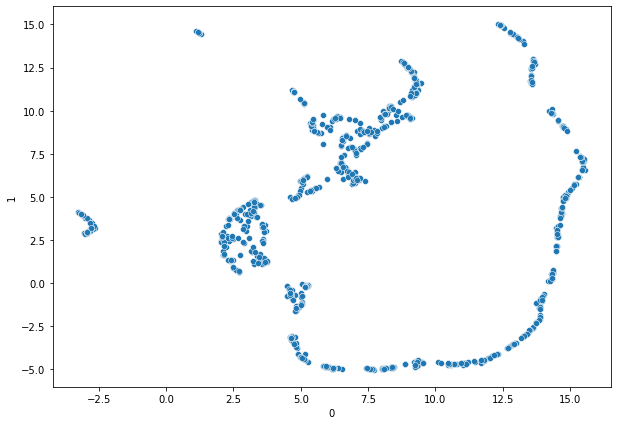

In [36]:
plt.figure(figsize=(10,7))
# set axes
x = reduced_df[0]
y = reduced_df[1]

sns.scatterplot(x=x, y=y)

# It looks like the number of spikes may be over represented in UMAP space, let's try normalizing those values. Otherwise, we may need to adjust the feature criteria.

In [37]:
normalized_df = parameter_df.copy()

In [38]:
normalized_df

,ROI mean,Num. spikes,Mean spike duration,Mean spike height,Mean spike mean
0,0.552928,24,7.833333,0.581958,0.571542
1,0.619997,96,2.125000,0.637510,0.627292
2,0.564521,78,1.974359,0.582513,0.573064
3,0.548718,29,5.551724,0.591724,0.578517
4,0.623629,48,2.645833,0.669687,0.649771
...,...,...,...,...,...
877,0.606588,107,2.514019,0.625645,0.616308
878,0.595188,53,1.113208,0.614887,0.601472
879,0.663390,7,10.857143,0.812143,0.726143
880,0.530516,76,4.052632,0.558539,0.545987


In [39]:
col_1 = 'Num. spikes'
col_2 = 'Mean spike duration'
normalized_df[col_1] = normalized_df[col_1] / normalized_df[col_1].abs().max()
normalized_df[col_2] = normalized_df[col_2] / normalized_df[col_2].abs().max()

normalized_df

,ROI mean,Num. spikes,Mean spike duration,Mean spike height,Mean spike mean
0,0.552928,0.157895,0.093393,0.581958,0.571542
1,0.619997,0.631579,0.025335,0.637510,0.627292
2,0.564521,0.513158,0.023539,0.582513,0.573064
3,0.548718,0.190789,0.066190,0.591724,0.578517
4,0.623629,0.315789,0.031545,0.669687,0.649771
...,...,...,...,...,...
877,0.606588,0.703947,0.029973,0.625645,0.616308
878,0.595188,0.348684,0.013272,0.614887,0.601472
879,0.663390,0.046053,0.129444,0.812143,0.726143
880,0.530516,0.500000,0.048318,0.558539,0.545987


In [40]:
norm_reducer = UMAP(n_neighbors=15, # default 15, The size of local neighborhood (in terms of number of neighboring sample points) used for manifold approximation.
               n_components=2, # default 2, The dimension of the space to embed into.
               metric='euclidean', # default 'euclidean', The metric to use to compute distances in high dimensional space.
               n_epochs=100, # default None, The number of training epochs to be used in optimizing the low dimensional embedding. Larger values result in more accurate embeddings. 
               learning_rate=1.0, # default 1.0, The initial learning rate for the embedding optimization.
               init='spectral', # default 'spectral', How to initialize the low dimensional embedding. Options are: {'spectral', 'random', A numpy array of initial embedding positions}.
               min_dist=0.05, # default 0.1, The effective minimum distance between embedded points.
               spread=1.0, # default 1.0, The effective scale of embedded points. In combination with ``min_dist`` this determines how clustered/clumped the embedded points are.
               low_memory=False, # default False, For some datasets the nearest neighbor computation can consume a lot of memory. If you find that UMAP is failing due to memory constraints consider setting this option to True.
               set_op_mix_ratio=1.0, # default 1.0, The value of this parameter should be between 0.0 and 1.0; a value of 1.0 will use a pure fuzzy union, while 0.0 will use a pure fuzzy intersection.
               local_connectivity=1, # default 1, The local connectivity required -- i.e. the number of nearest neighbors that should be assumed to be connected at a local level.
               repulsion_strength=1.0, # default 1.0, Weighting applied to negative samples in low dimensional embedding optimization.
               negative_sample_rate=5, # default 5, Increasing this value will result in greater repulsive force being applied, greater optimization cost, but slightly more accuracy.
               transform_queue_size=4.0, # default 4.0, Larger values will result in slower performance but more accurate nearest neighbor evaluation.
               a=None, # default None, More specific parameters controlling the embedding. If None these values are set automatically as determined by ``min_dist`` and ``spread``.
               b=None, # default None, More specific parameters controlling the embedding. If None these values are set automatically as determined by ``min_dist`` and ``spread``.
               random_state=42, # default: None, If int, random_state is the seed used by the random number generator;
               metric_kwds=None, # default None) Arguments to pass on to the metric, such as the ``p`` value for Minkowski distance.
               angular_rp_forest=False, # default False, Whether to use an angular random projection forest to initialise the approximate nearest neighbor search.
               target_n_neighbors=-1, # default -1, The number of nearest neighbors to use to construct the target simplcial set. If set to -1 use the ``n_neighbors`` value.
               #target_metric='categorical', # default 'categorical', The metric used to measure distance for a target array is using supervised dimension reduction. By default this is 'categorical' which will measure distance in terms of whether categories match or are different. 
               #target_metric_kwds=None, # dict, default None, Keyword argument to pass to the target metric when performing supervised dimension reduction. If None then no arguments are passed on.
               #target_weight=0.5, # default 0.5, weighting factor between data topology and target topology.
               transform_seed=42, # default 42, Random seed used for the stochastic aspects of the transform operation.
               verbose=False, # default False, Controls verbosity of logging.
               unique=False, # default False, Controls if the rows of your data should be uniqued before being embedded. 
              )

norm_data_reduced = norm_reducer.fit_transform(normalized_df)
print(norm_data_reduced.shape)
norm_reduced_df = pd.DataFrame(norm_data_reduced)

(882, 2)


<AxesSubplot:xlabel='0', ylabel='1'>

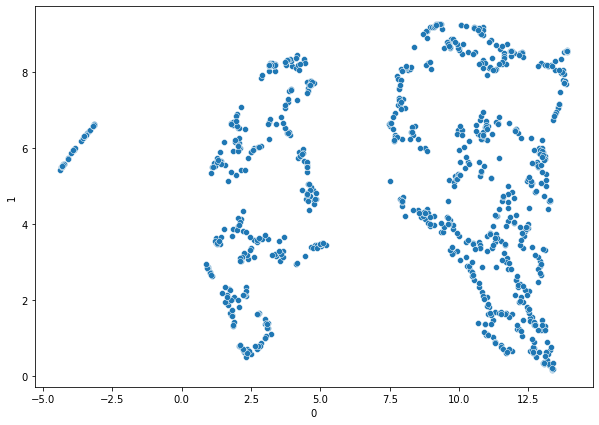

In [41]:
plt.figure(figsize=(10,7))
# set axes
x = norm_reduced_df[0]
y = norm_reduced_df[1]

sns.scatterplot(x=x, y=y)

# Two nice big clusters--cool! Let's run DBSCAN and evaluate.

In [42]:
from sklearn.cluster import DBSCAN

In [43]:
db = DBSCAN(eps=.7, min_samples=1).fit(norm_reduced_df)
labels = db.labels_
# print(labels)
print(set(labels))
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(n_clusters_)

print(Counter(labels))

{0, 1, 2, 3}
4
Counter({0: 543, 2: 154, 1: 149, 3: 36})


Text(-4, 5, 'Cluster 3')

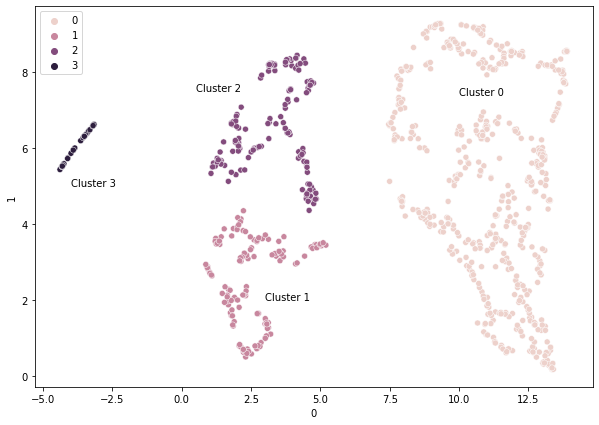

In [44]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=x, y=y, hue=labels)
plt.annotate('Cluster 0', xy=(10,7.4))
plt.annotate('Cluster 1', xy=(3,2))
plt.annotate('Cluster 2', xy=(0.5,7.5))
plt.annotate('Cluster 3', xy=(-4,5))

In [45]:
print(labels[160:170])
print(labels[25])

[3 0 3 0 0 1 1 0 2 1]
0


In [46]:
print(list(normalized_df.iloc[0]))
print('Cluster 0')

print(list(normalized_df.iloc[1]))
print('Cluster 1')

print(list(normalized_df.iloc[2]))
print('Cluster 2')

print(list(normalized_df.iloc[17]))
print('Cluster 3')

# ax[0,0].plot(id_0[new_cols[2]])
# ax[0,0].xaxis.set_ticklabels([])
# ax[0,0].set_ylabel('Ca Ratio')
# ax[0,0].set_title('Cluster 0')

[0.5529280774550485, 0.15789473684210525, 0.09339294585196224, 0.5819583333333332, 0.5715416666666666]
Cluster 0
[0.6199972337482711, 0.631578947368421, 0.02533532041728763, 0.6375104166666666, 0.6272916666666667]
Cluster 1
[0.5645214384508991, 0.5131578947368421, 0.023539302227826818, 0.5825128205128205, 0.5730641025641026]
Cluster 2
[0.621701244813278, 0.0, 0.0, 0.0, 0.0]
Cluster 3


Text(0.5, 1.0, 'Cluster 0')

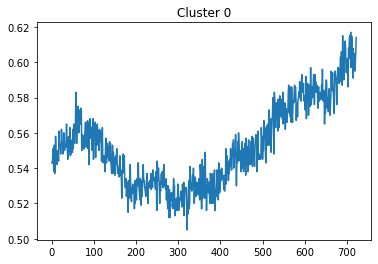

In [47]:
plt.plot(list(df.iloc[0])[1:])
plt.title('Cluster 0')

Text(0.5, 1.0, 'Cluster 1')

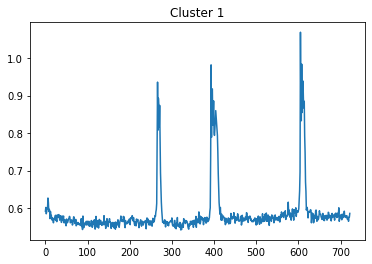

In [48]:
plt.plot(list(df.iloc[164])[1:])
plt.title('Cluster 1')

Text(0.5, 1.0, 'Cluster 2')

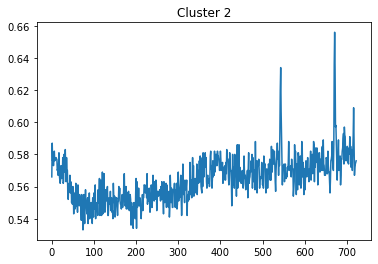

In [49]:
plt.plot(list(df.iloc[2])[1:])
plt.title('Cluster 2')

Text(0.5, 1.0, 'Cluster 2')

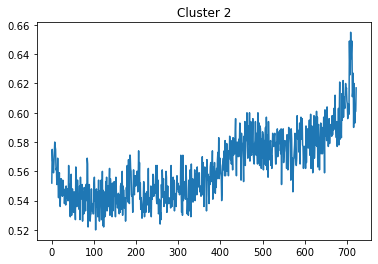

In [50]:
plt.plot(list(df.iloc[5])[1:])
plt.title('Cluster 2')

Text(0.5, 1.0, 'Cluster 3')

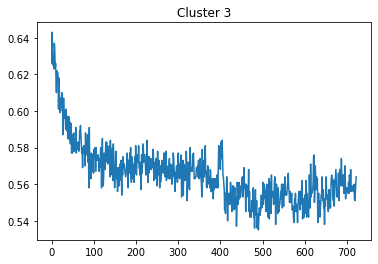

In [51]:
plt.plot(list(df.iloc[160])[1:])
plt.title('Cluster 3')

Text(0.5, 1.0, 'Cluster 3')

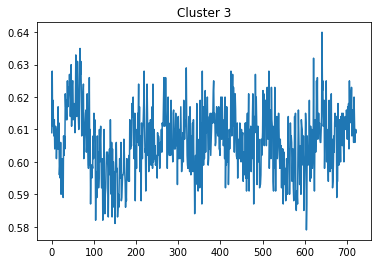

In [52]:
plt.plot(list(df.iloc[168])[1:])
plt.title('Cluster 3')

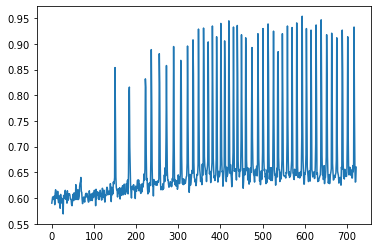

In [53]:
plt.plot(list(df.iloc[25])[1:])

# Okay well, this clustering is not very helpful either BUT I do think that we are on the right path by tweaking the spike criteria. Let's do some trial-and-error optimization.

In [54]:
# function to 

def calc_features(starts, ends, roi, print_=False):
    durations = [ends[i] - starts[i] for i in range(len(ends))]
    heights = []
    means = []

    #     print(starts)
    #     print(ends)

    if len(starts) > 0:
        for i in range(len(starts)):
            spike = roi[starts[i]-1:ends[i]+1]
            height = max(spike)

            heights.append(height)
            mean_ = round(mean(spike), 3)
            means.append(mean_)


        parameters = [mean(roi), len(starts), mean(durations), mean(heights), mean(means)]
    
    elif len(starts) == 0:
        parameters = [mean(roi), len(starts), 0, 0, 0]
    
    if print_:
        print('ROI mean ratio     : ', parameters[0])
        print('Num. spikes        : ', parameters[1])
        print('Mean spike duration: ', parameters[2])
        print('Mean spike height  : ', parameters[3])
        print('Mean spike mean    : ', parameters[4])
    
    return parameters

[0.6199972337482711, 96, 2.125, 0.6375104166666666, 0.62728125]


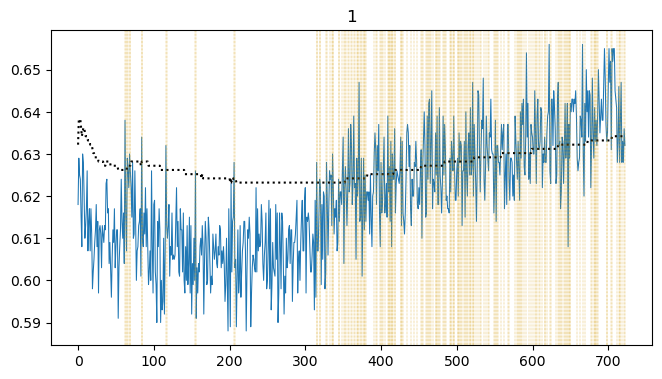

In [55]:
roi = 1

roi_vals = list(df.iloc[roi])[1:]

starts, ends, threshold = find_spikes(roi_vals, std_threshold=1)
roi_params = calc_features(starts, ends, roi_vals, print_=False)
print(roi_params)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,4), dpi=100)
fig.tight_layout(pad=2)
ax.plot(roi_vals, linewidth=.75)
plt.plot(threshold, color='k', linestyle=':', linewidth=1.5)
ax.set_title(roi)

for start in starts:
    plt.axvline(x=start, color='goldenrod', linestyle='dashdot', linewidth=.25)

for end in ends:
    plt.axvline(x=end, color='goldenrod', linestyle='dashdot', linewidth=.25)

ROI mean ratio     :  0.5529280774550485
Num. spikes        :  24
Mean spike duration:  7.833333333333333
Mean spike height  :  0.5819583333333332
Mean spike mean    :  0.5715416666666666
ROI mean ratio     :  0.6199972337482711
Num. spikes        :  96
Mean spike duration:  2.125
Mean spike height  :  0.6375104166666666
Mean spike mean    :  0.62728125
ROI mean ratio     :  0.5645214384508991
Num. spikes        :  78
Mean spike duration:  1.9743589743589745
Mean spike height  :  0.5825128205128205
Mean spike mean    :  0.5730897435897435
ROI mean ratio     :  0.5487178423236515
Num. spikes        :  29
Mean spike duration:  5.551724137931035
Mean spike height  :  0.5917241379310344
Mean spike mean    :  0.5785172413793104
ROI mean ratio     :  0.6236293222683265
Num. spikes        :  48
Mean spike duration:  2.6458333333333335
Mean spike height  :  0.6696875
Mean spike mean    :  0.6497291666666667
ROI mean ratio     :  0.562716459197787
Num. spikes        :  75
Mean spike duration:  

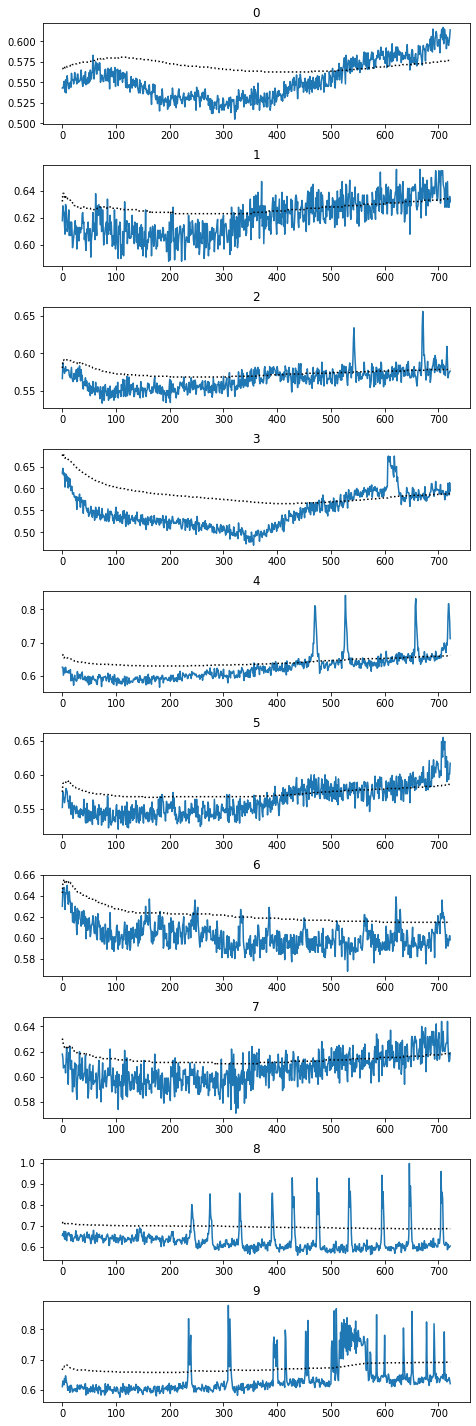

In [56]:
%%time
# let's vizualize ALL of the cell data

index = 10

fig, ax = plt.subplots(nrows=index, ncols=1, figsize=(7,index*2))
fig.tight_layout(pad=2)

for roi in range(index):
    
    roi_vals = list(df.iloc[roi])[1:]
    starts, ends, threshold = find_spikes(roi_vals, std_threshold=1)
    roi_params = calc_features(starts, ends, roi_vals, print_=True)

    ax[roi].plot(list(df.iloc[roi])[1:])
    ax[roi].plot(threshold, color='k', linestyle=':', linewidth=1.5)
    ax[roi].set_title(roi)

# Next step: let's hard code a spike threshold (10%, 15% above mean value)

In [57]:
def find_hard_spikes(array, percent_threshold=0.15):
    
    # instead of using standard deviation, this function will draw a threshold using a hard coded percent value
    
    ma = calc_cum_ma(array)
    threshold = [i + (i * percent_threshold) for i in ma]
    
    spike_starts = list()
    spike_ends = list()

    in_spike = False
    for i in range(len(array)):
        if array[i] >= threshold[i] and array[i-1] < threshold[i] and in_spike == False:
            spike_starts.append(i)
            in_spike = True
        if array[i] <= threshold[i] and array[i-1] > threshold[i] and in_spike == True:
            spike_ends.append(i)
            in_spike = False
    
    # if a spike starts and continues until the end of the frame, we'll just consider the final index - 1 as the end
    if len(spike_starts) > len(spike_ends):
        spike_ends.append(int(len(array) - 1))
    return spike_starts, spike_ends, threshold

ROI mean ratio     :  0.5529280774550485
Num. spikes        :  29
Mean spike duration:  5.724137931034483
Mean spike height  :  0.5851379310344828
Mean spike mean    :  0.5755172413793103


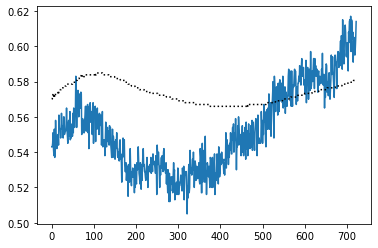

In [58]:
roi_0 = list(df.iloc[0])[1:]

starts, ends, threshold = find_hard_spikes(roi_0, percent_threshold=0.05)
roi_params = calc_features(starts, ends, roi_0, print_=True)

plt.plot(roi_0)
plt.plot(threshold, color='k', linestyle=':', linewidth=1.5)

ROI mean ratio     :  0.6020470262793914
Num. spikes        :  2
Mean spike duration:  1
Mean spike height  :  0.6375
Mean spike mean    :  0.6265000000000001


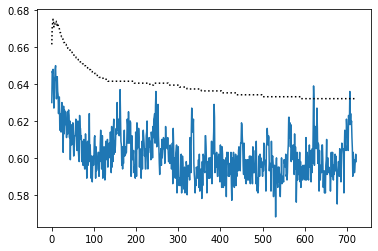

In [59]:
roi_6 = list(df.iloc[6])[1:]

starts, ends, threshold = find_hard_spikes(roi_6, percent_threshold=0.05)
roi_params = calc_features(starts, ends, roi_6, print_=True)

plt.plot(roi_6)
plt.plot(threshold, color='k', linestyle=':', linewidth=1.5)

# Yeah, no, this isn't very good because the cumulative moving average isn't senstive enough towards slow shifts near the end of the time series. We need non-cumulative moving averages. 

# Next step: let's experiment with using moving average crossovers as spike thresholds (ie, when MA2 crosses MA10, etc)

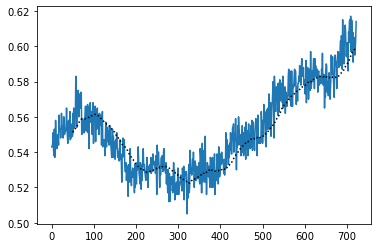

In [60]:
# now we need a function to calculate non-cumulative moving averages

def calc_ma(array, size): # function to calculate cumulative moving averages for an array
    
    # Convert array of integers to pandas series
    numbers_series = pd.Series(array)

    # Get the window of series of observations of specified window size
    windows = numbers_series.rolling(size)

    # Create a series of moving
    # averages of each window
    moving_averages = windows.mean()

    # Convert pandas series back to list
    moving_averages_list = moving_averages.tolist()

    return moving_averages_list



ma_0_10 = calc_ma(roi_0, size=50)

plt.plot(roi_0)
plt.plot(ma_0_10, color='k', linestyle=':', linewidth=1.5)

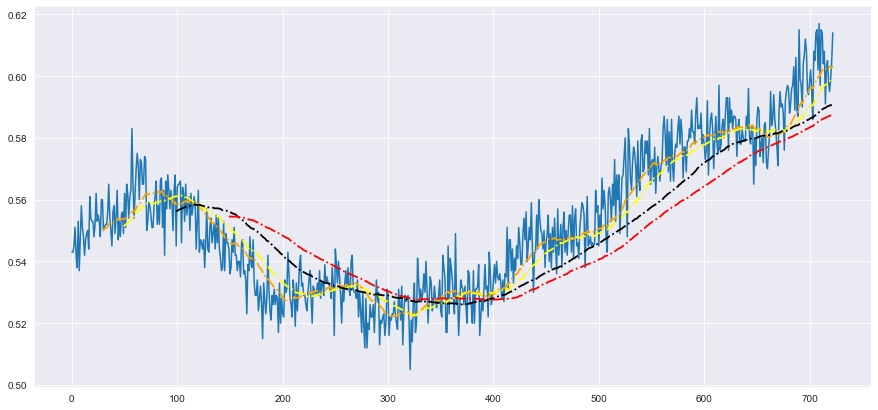

In [61]:
mas = [30,50,100,150]
colors = ['orange', 'yellow', 'k', 'red']

sns.set_style('darkgrid')
plt.figure(figsize=(15,7))
plt.plot(roi_0)

for i in range(len(mas)):
    ma_vals = calc_ma(roi_0, size=mas[i])
    plt.plot(ma_vals, color=colors[i], linestyle='dashdot', linewidth=1.8)

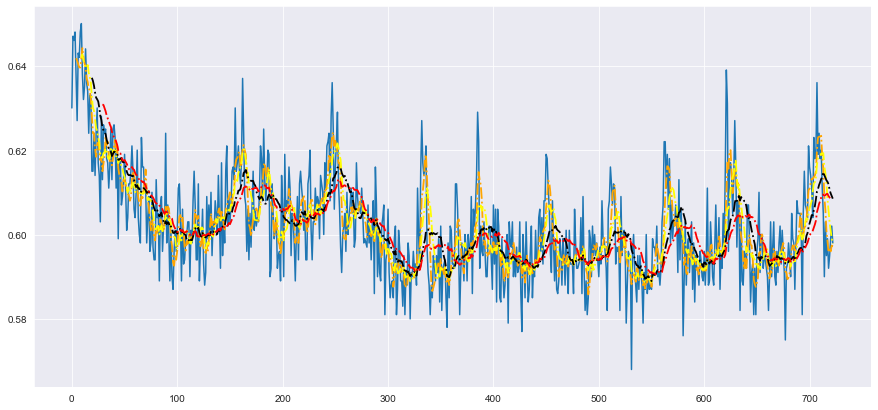

In [63]:
mas = [5,10,20,30]
colors = ['orange', 'yellow', 'k', 'red']

sns.set_style('darkgrid')
plt.figure(figsize=(15,7))
plt.plot(roi_6)

for i in range(len(mas)):
    ma_vals = calc_ma(roi_6, size=mas[i])
    plt.plot(ma_vals, color=colors[i], linestyle='dashdot', linewidth=1.8)

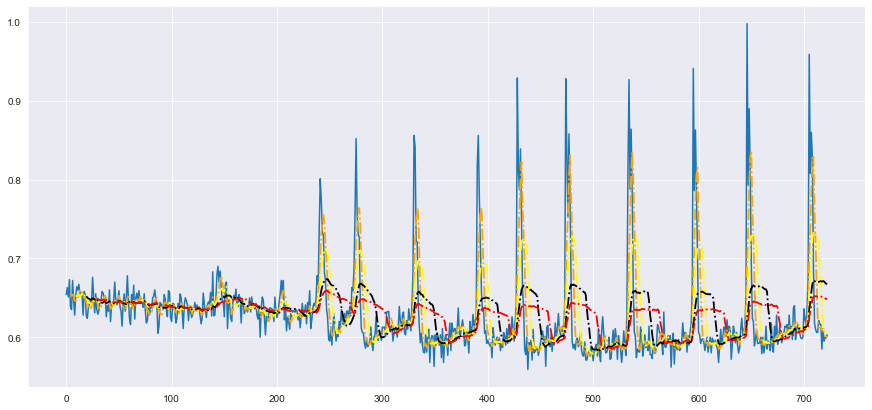

In [64]:
# let's try looking at moving averages for roi 8 because it has clean regular oscillations

roi_8 = list(df.iloc[8])[1:]

mas = [5,10,20,30]
colors = ['orange', 'yellow', 'k', 'red']

sns.set_style('darkgrid')
plt.figure(figsize=(15,7))
plt.plot(roi_8)

for i in range(len(mas)):
    ma_vals = calc_ma(roi_8, size=mas[i])
    plt.plot(ma_vals, color=colors[i], linestyle='dashdot', linewidth=1.8)

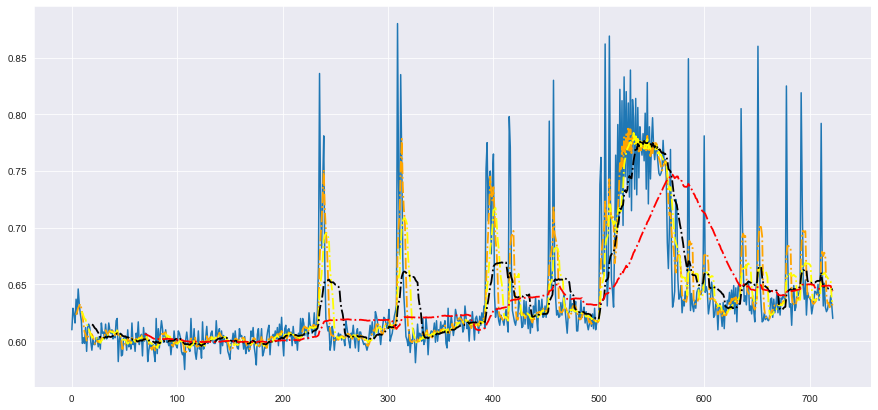

In [68]:
# let's try looking at moving averages for roi 9 because it includes a high frequency period

roi_9 = list(df.iloc[9])[1:]

mas = [5,10,20,70]
colors = ['orange', 'yellow', 'k', 'red']

sns.set_style('darkgrid')
plt.figure(figsize=(15,7))
plt.plot(roi_9)

for i in range(len(mas)):
    ma_vals = calc_ma(roi_9, size=mas[i])
    plt.plot(ma_vals, color=colors[i], linestyle='dashdot', linewidth=1.8)

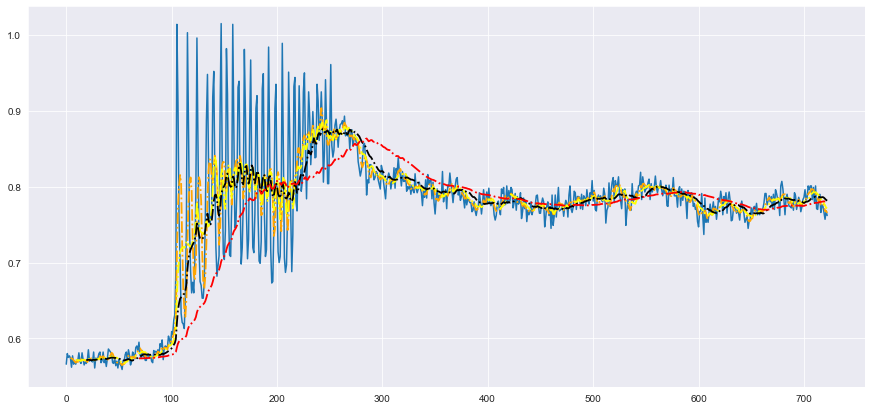

In [92]:
# let's try looking at moving averages for roi 472 because it includes a plateau

roi_472 = list(df.iloc[472])[1:]

mas = [5,10,20,70]
colors = ['orange', 'yellow', 'k', 'red']

sns.set_style('darkgrid')
plt.figure(figsize=(15,7))
plt.plot(roi_472)

for i in range(len(mas)):
    ma_vals = calc_ma(roi_472, size=mas[i])
    plt.plot(ma_vals, color=colors[i], linestyle='dashdot', linewidth=1.8)

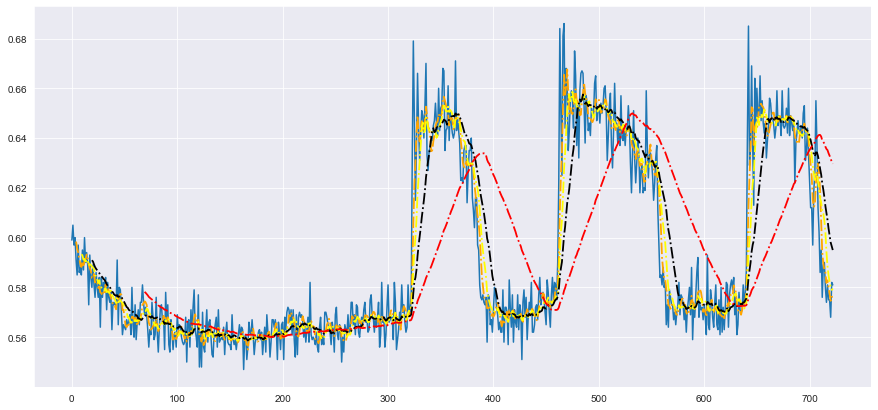

In [126]:
# let's try looking at moving averages for roi 472 because it has high frequency oscillations

roi_472 = list(df.iloc[425])[1:]

mas = [5,10,20,70]
colors = ['orange', 'yellow', 'k', 'red']

sns.set_style('darkgrid')
plt.figure(figsize=(15,7))
plt.plot(roi_472)

for i in range(len(mas)):
    ma_vals = calc_ma(roi_472, size=mas[i])
    plt.plot(ma_vals, color=colors[i], linestyle='dashdot', linewidth=1.8)

# Based on trial and error, it looks like MA20 does the best job as smoothing out noise and catching discrete spikes. Now, for my next trick, we'll plot MA20 against the cumulative moving average + 0.5 stdev to see if that looks like a good threshold.

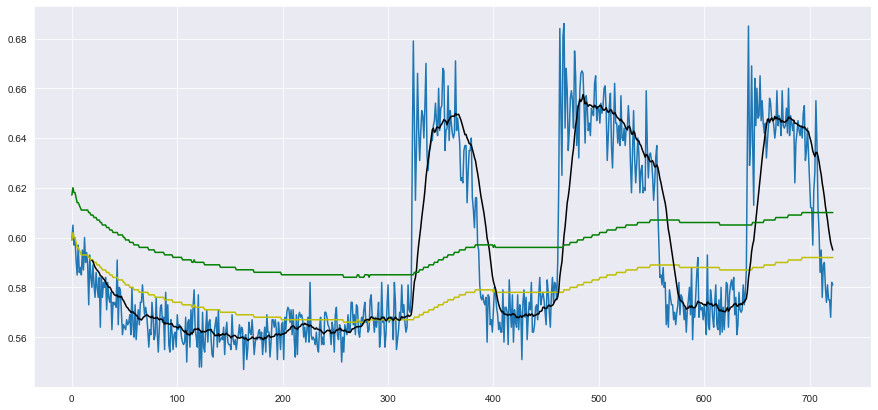

In [129]:
roi_425 = list(df.iloc[425])[1:]
cum_ma_425 = calc_cum_ma(roi_425)
ma_425_20 = calc_ma(roi_425, size=20)
half_std = np.std(roi_425) * 0.5
threshold_425 = [i + half_std for i in cum_ma_425]

sns.set_style('darkgrid')
plt.figure(figsize=(15,7))
plt.plot(roi_425)
plt.plot(cum_ma_425, color='y')
plt.plot(ma_425_20, color='k')
plt.plot(threshold_425, color='green')

# for i in range(len(mas)):
#     ma_vals = calc_ma(roi_472, size=mas[i])
#     plt.plot(ma_vals, color=colors[i], linestyle='dashdot', linewidth=1.8)

# Okay yeah, I like this, let's make a function and try it on some other ids

In [152]:
starts, ends, threshold = find_spikes(roi_425, std_threshold=.5)
print(starts)
print(ends)

[323, 462, 641, 704]
[385, 557, 703, 709]


In [155]:
def find_ma_spikes(roi_array, ma_array, std_threshold=0.5):
    
    cum_ma = calc_cum_ma(roi_array)
    std = np.std(roi_array) * std_threshold
    threshold = [i + std for i in cum_ma]
    
    spike_starts = list()
    spike_ends = list()

    in_spike = False
    for i in range(len(ma_array)):
        if ma_array[i] >= threshold[i] and ma_array[i-1] < threshold[i] and in_spike == False:
            spike_starts.append(i-2)
            in_spike = True
        if ma_array[i] <= threshold[i] and ma_array[i-1] > threshold[i] and in_spike == True:
            spike_ends.append(i)
            in_spike = False
    
    # if a spike starts and continues until the end of the frame, we'll just consider the final index - 1 as the end
    if len(spike_starts) > len(spike_ends):
        spike_ends.append(int(len(ma_array) - 1))
    return spike_starts, spike_ends, threshold

In [156]:
starts, ends, threshold = find_ma_spikes(roi_425, ma_425_20, std_threshold=.5)
print(starts)
print(ends)

[325, 465, 647]
[396, 565, 716]


In [154]:
roi_425[320:330]

[0.571, 0.57, 0.577, 0.633, 0.679, 0.648, 0.615, 0.637, 0.666, 0.644]

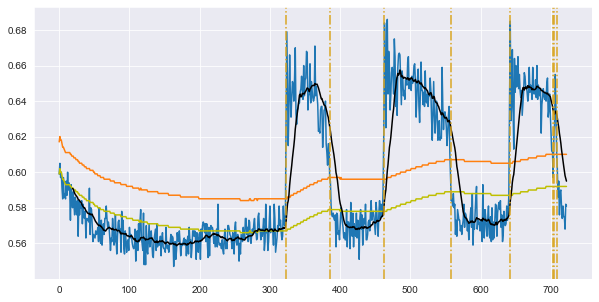

In [145]:
plt.figure(figsize=(10,5))
plt.plot(roi_425)
plt.plot(threshold)
plt.plot(cum_ma_425, color='y')
plt.plot(ma_425_20, color='k')

for i in range(len(starts)):
    plt.axvline(x=starts[i], color='goldenrod', linestyle='dashdot')
    plt.axvline(x=ends[i], color='goldenrod', linestyle='dashdot')

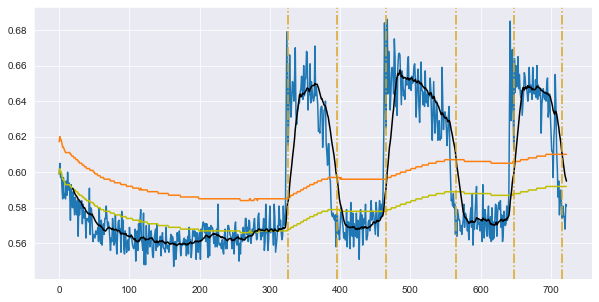

In [157]:
plt.figure(figsize=(10,5))
plt.plot(roi_425)
plt.plot(threshold)
plt.plot(cum_ma_425, color='y')
plt.plot(ma_425_20, color='k')

for i in range(len(starts)):
    plt.axvline(x=starts[i], color='goldenrod', linestyle='dashdot')
    plt.axvline(x=ends[i], color='goldenrod', linestyle='dashdot')

In [230]:
def plot_ma_spikes(roi_id, ma_size=20, std_ratio=0.5, plot=True, return_=False):
    # this function will calculate and plot spikes found using the following definition:
    # spike begins when MA20 crosses 0.5 standard deviations above the cumulative moving average
    
    roi = list(df.iloc[roi_id])[1:]
    roi_ma = calc_ma(roi, size=ma_size)
    
    starts, ends, threshold = find_ma_spikes(roi, roi_ma, std_threshold=std_ratio)
    
    if plot:
        plt.figure(figsize=(10,5))
        plt.plot(roi)
        plt.plot(roi_ma, color='k')
        plt.plot(threshold, color='y')
        
        for i in range(len(starts)):
            plt.axvline(x=starts[i], color='goldenrod', linestyle='dashdot')
            plt.axvline(x=ends[i], color='goldenrod', linestyle='dashdot')
    
    if return_:
        return starts, ends, roi

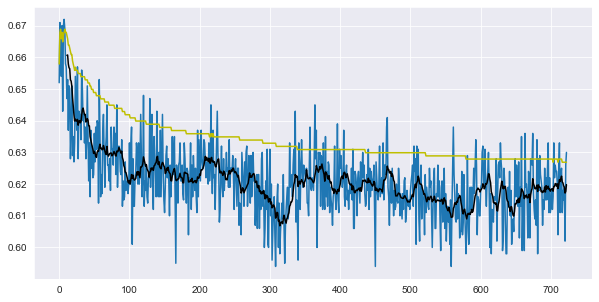

In [226]:
plot_ma_spikes(300, ma_size=12, std_ratio=0.5)

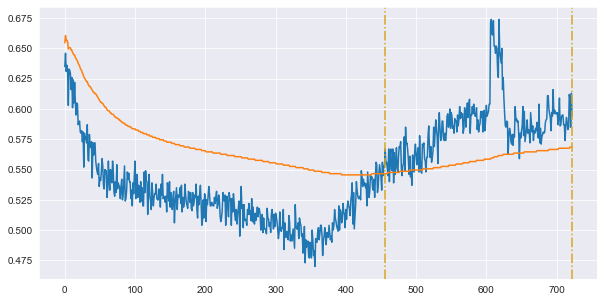

In [163]:
plot_ma_spikes(3)

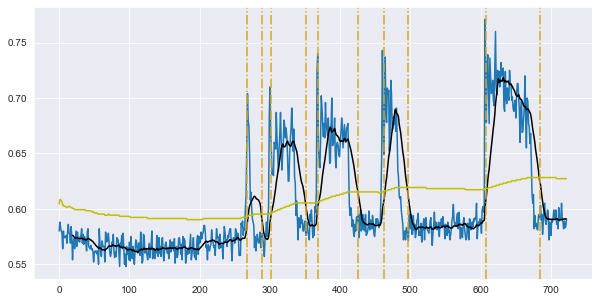

In [228]:
plot_ma_spikes(399)

# Albeit imperfect, I think that this spike criteria is much more accurate. We might be able to improve a little bit by using a long 70+ MA instead of the cumulative MA for setting the threshold, but let's go ahead and cluster this and see what we see.

In [229]:
# Actually, wait, before we cluster again, let's add average integral values as another feature

[267, 301, 368, 462, 607]
[288, 351, 426, 496, 684]


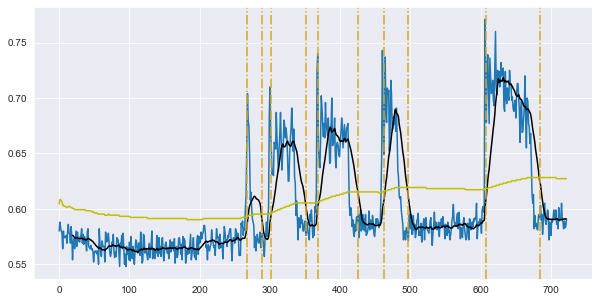

In [233]:
starts_399, ends_399, roi_399 = plot_ma_spikes(399, return_=True)
print(starts_399)
print(ends_399)

In [245]:
cum_ma_399 = calc_cum_ma(roi_399)

In [241]:
spike_0 = roi_399[starts_399[0]:ends_399[0]]
print(spike_0)

[0.655, 0.704, 0.679, 0.675, 0.65, 0.608, 0.615, 0.6, 0.591, 0.588, 0.585, 0.565, 0.575, 0.562, 0.571, 0.577, 0.572, 0.569, 0.571, 0.579, 0.565]


In [250]:
bottom_0 = cum_ma_399[starts_399[0]]
spike_0_norm = [round(point - bottom_0, 3) for point in spike_0]
print(spike_0_norm)

[0.087, 0.136, 0.111, 0.107, 0.082, 0.04, 0.047, 0.032, 0.023, 0.02, 0.017, -0.003, 0.007, -0.006, 0.003, 0.009, 0.004, 0.001, 0.003, 0.011, -0.003]


In [251]:
np.trapz(spike_0_norm)

0.686

In [253]:
integrals_399 = list()

for i in range(len(starts_399)):
    spike = roi_399[starts_399[i]:ends_399[i]]
    
    # identify the floor of the spike based on the cum ma at the first time point
    floor = cum_ma_399[starts_399[i]]
    norm_spike = [round(point - floor, 3) for point in spike]
    integrals_399.append(np.trapz(norm_spike))

In [271]:
def calc_integral(spike, cum_ma):
    floor = cum_ma[i]
    norm_spike = [round(point - floor, 3) for point in spike]
    integral = np.trapz(norm_spike)
    return integral

In [258]:
print(integrals_399)
np.mean(integrals_399)

[0.686, 3.1879999999999997, 3.8245000000000005, 1.9309999999999998, 7.012499999999999]


3.3284

# I like what I'm seeing with these normalized spike integral values, let's add this as a new feature and do some more clustering!

In [274]:
parameter_list_2 = list()


for id_ in ids:
    roi = list(list(df[df['ID'] == id_].values)[0][1:])
    roi_ma = calc_ma(roi, size=20)

    # use the new ma
    starts, ends, threshold = find_ma_spikes(roi, roi_ma, std_threshold=0.5)
    roi_cum_ma = calc_cum_ma(roi)

    durations = [ends[i] - starts[i] for i in range(len(ends))]
    heights = []
    means = []
    integrals = []


    if len(starts) > 0:
        for i in range(len(starts)):
            spike = roi[starts[i]-1:ends[i]+1]
            
            height = max(spike)   
            heights.append(height)
            
            mean_ = round(mean(spike), 3)
            means.append(mean_)
            
            integral = calc_integral(spike, roi_cum_ma)
            integrals.append(integral)
            
        parameters = [mean(roi), len(starts), mean(integrals), mean(durations), mean(heights), mean(means)]
        parameter_list_2.append(parameters)
        
    elif len(starts) == 0:
        parameters = [mean(roi), len(starts), 0, 0, 0, 0]
        parameter_list_2.append(parameters)


parameter_columns_2 = ['ROI mean', 'Num. spikes', 'Mean Spike Integral', 'Mean spike duration', 'Mean spike height', 'Mean spike mean']
parameter_df_2 = pd.DataFrame(parameter_list_2, columns = parameter_columns_2)

In [275]:
parameter_df_2

,ROI mean,Num. spikes,Mean Spike Integral,Mean spike duration,Mean spike height,Mean spike mean
0,0.552928,2,4.278000,111.0,0.5920,0.568500
1,0.619997,2,1.071750,194.0,0.6430,0.624500
2,0.564521,4,-0.296875,93.0,0.6010,0.570000
3,0.548718,1,-13.253000,266.0,0.6740,0.585000
4,0.623629,2,4.340750,179.5,0.7390,0.636000
...,...,...,...,...,...,...
877,0.606588,2,10.052500,252.0,0.6295,0.605500
878,0.595188,3,-0.111000,9.0,0.6130,0.600667
879,0.663390,6,1.446833,32.5,0.8245,0.696833
880,0.530516,1,31.315000,461.0,0.6010,0.551000


# Let's explore the distributions of these values

<AxesSubplot:xlabel='ROI mean', ylabel='Count'>

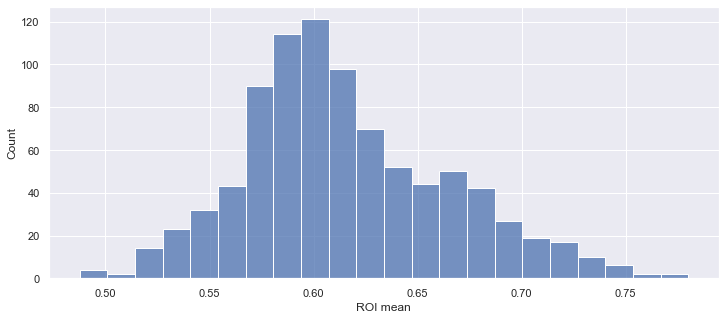

In [330]:
sns.set(rc={'figure.figsize':(12,5)})
sns.histplot(parameter_df_2.iloc[:,0])
# plt.title(parameter_df_2.columns[4])

In [295]:
# let's normalize cols 1,2,3
# Just kidding, let's normalize everything

normalized_df_2 = parameter_df_2.copy()

col_s = parameter_columns_2

normalized_df_2[col_s[0]] = normalized_df_2[col_s[0]] / normalized_df_2[col_s[0]].abs().max()
normalized_df_2[col_s[1]] = normalized_df_2[col_s[1]] / normalized_df_2[col_s[1]].abs().max()
normalized_df_2[col_s[2]] = normalized_df_2[col_s[2]] / normalized_df_2[col_s[2]].abs().max()
normalized_df_2[col_s[3]] = normalized_df_2[col_s[3]] / normalized_df_2[col_s[3]].abs().max()
normalized_df_2[col_s[4]] = normalized_df_2[col_s[4]] / normalized_df_2[col_s[4]].abs().max()
normalized_df_2[col_s[5]] = normalized_df_2[col_s[5]] / normalized_df_2[col_s[5]].abs().max()

normalized_df_2

,ROI mean,Num. spikes,Mean Spike Integral,Mean spike duration,Mean spike height,Mean spike mean
0,0.708826,0.08,0.049506,0.196113,0.448825,0.637868
1,0.794805,0.08,0.012403,0.342756,0.487491,0.700701
2,0.723688,0.16,-0.003436,0.164311,0.455648,0.639551
3,0.703428,0.04,-0.153367,0.469965,0.510993,0.656381
4,0.799461,0.08,0.050232,0.317138,0.560273,0.713604
...,...,...,...,...,...,...
877,0.777615,0.08,0.116330,0.445230,0.477255,0.679383
878,0.763001,0.12,-0.001285,0.015901,0.464746,0.673960
879,0.850432,0.24,0.016743,0.057420,0.625095,0.781861
880,0.680094,0.04,0.362386,0.814488,0.455648,0.618233


In [296]:
norm_reducer_2 = UMAP(n_neighbors=15, # default 15, The size of local neighborhood (in terms of number of neighboring sample points) used for manifold approximation.
               n_components=2, # default 2, The dimension of the space to embed into.
               metric='euclidean', # default 'euclidean', The metric to use to compute distances in high dimensional space.
               n_epochs=100, # default None, The number of training epochs to be used in optimizing the low dimensional embedding. Larger values result in more accurate embeddings. 
               learning_rate=1.0, # default 1.0, The initial learning rate for the embedding optimization.
               init='spectral', # default 'spectral', How to initialize the low dimensional embedding. Options are: {'spectral', 'random', A numpy array of initial embedding positions}.
               min_dist=0.05, # default 0.1, The effective minimum distance between embedded points.
               spread=1.0, # default 1.0, The effective scale of embedded points. In combination with ``min_dist`` this determines how clustered/clumped the embedded points are.
               low_memory=False, # default False, For some datasets the nearest neighbor computation can consume a lot of memory. If you find that UMAP is failing due to memory constraints consider setting this option to True.
               set_op_mix_ratio=1.0, # default 1.0, The value of this parameter should be between 0.0 and 1.0; a value of 1.0 will use a pure fuzzy union, while 0.0 will use a pure fuzzy intersection.
               local_connectivity=1, # default 1, The local connectivity required -- i.e. the number of nearest neighbors that should be assumed to be connected at a local level.
               repulsion_strength=1.0, # default 1.0, Weighting applied to negative samples in low dimensional embedding optimization.
               negative_sample_rate=5, # default 5, Increasing this value will result in greater repulsive force being applied, greater optimization cost, but slightly more accuracy.
               transform_queue_size=4.0, # default 4.0, Larger values will result in slower performance but more accurate nearest neighbor evaluation.
               a=None, # default None, More specific parameters controlling the embedding. If None these values are set automatically as determined by ``min_dist`` and ``spread``.
               b=None, # default None, More specific parameters controlling the embedding. If None these values are set automatically as determined by ``min_dist`` and ``spread``.
               random_state=42, # default: None, If int, random_state is the seed used by the random number generator;
               metric_kwds=None, # default None) Arguments to pass on to the metric, such as the ``p`` value for Minkowski distance.
               angular_rp_forest=False, # default False, Whether to use an angular random projection forest to initialise the approximate nearest neighbor search.
               target_n_neighbors=-1, # default -1, The number of nearest neighbors to use to construct the target simplcial set. If set to -1 use the ``n_neighbors`` value.
               #target_metric='categorical', # default 'categorical', The metric used to measure distance for a target array is using supervised dimension reduction. By default this is 'categorical' which will measure distance in terms of whether categories match or are different. 
               #target_metric_kwds=None, # dict, default None, Keyword argument to pass to the target metric when performing supervised dimension reduction. If None then no arguments are passed on.
               #target_weight=0.5, # default 0.5, weighting factor between data topology and target topology.
               transform_seed=42, # default 42, Random seed used for the stochastic aspects of the transform operation.
               verbose=False, # default False, Controls verbosity of logging.
               unique=False, # default False, Controls if the rows of your data should be uniqued before being embedded. 
              )

norm_data_reduced_2 = norm_reducer_2.fit_transform(normalized_df_2)
print(norm_data_reduced_2.shape)
norm_reduced_df_2 = pd.DataFrame(norm_data_reduced_2)

(882, 2)


<AxesSubplot:xlabel='0', ylabel='1'>

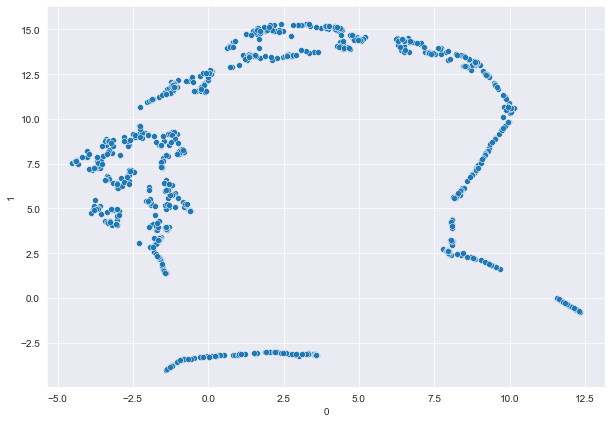

In [291]:
plt.figure(figsize=(10,7))
# set axes
x_2 = norm_reduced_df_2[0]
y_2 = norm_reduced_df_2[1]

sns.scatterplot(x=x_2, y=y_2)

<AxesSubplot:xlabel='0', ylabel='1'>

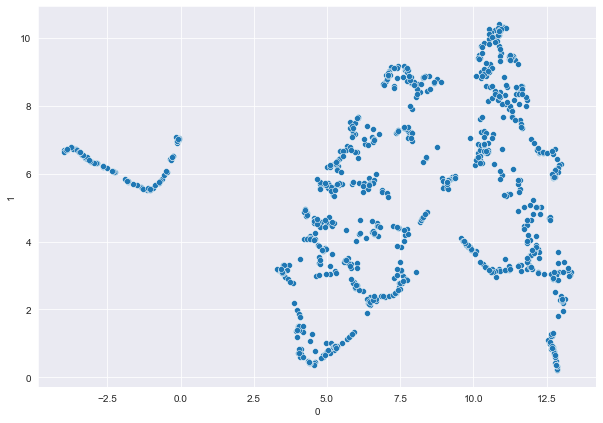

In [297]:
# normalized
plt.figure(figsize=(10,7))
# set axes
x_2 = norm_reduced_df_2[0]
y_2 = norm_reduced_df_2[1]

sns.scatterplot(x=x_2, y=y_2)